# Does Enhancing Images also Enhance the Outcome of Image Recognition of Neural Networks

# General Layout for this program

1. Imports
2. Load the image set
3. Create a copy of the image set and apply CLAHE to it
4. Load in 2 pretrained resnets
5. Train resnet1 on OG images, train resnet2 on CLAHE images
6. Compare performance of both

# Imports

In [1]:
import torch
import torchvision
from torchvision import models
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import os
import torchvision.transforms as transforms
from PIL import Image

import cv2

**Testing that I can apply clahe to a sample jpeg

# Open the ImageNet Spotted Salamanders

/var/folders/yw/ckylxvy95xld6whm7608ymr80000gn/T/ipykernel_16418/2140522557.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


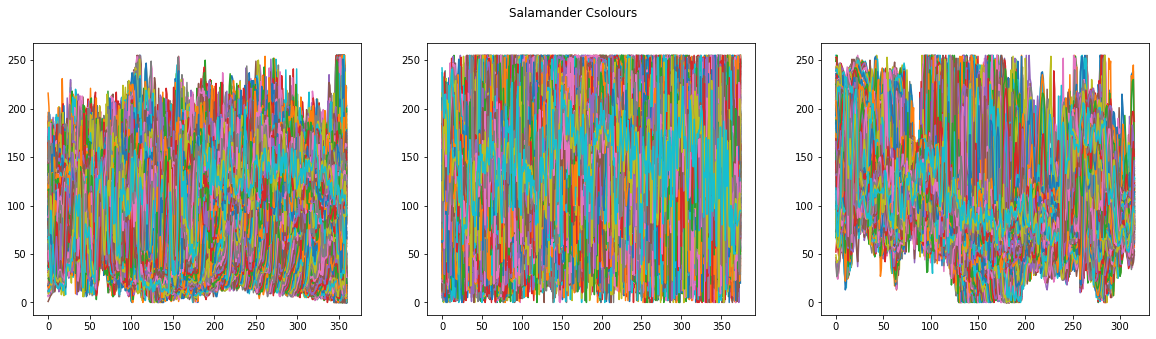

In [31]:
trainSetOG = []

directory = 'imageNet/ILSVRC/Data/CLS-LOC/train/n01632458'

#Load in all salamader images
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #trainSetOG.append(cv2.imread(f, 0))
        trainSetOG.append(cv2.imread(f, cv2.IMREAD_GRAYSCALE))

#copy it 
trainSetCLAHE = trainSetOG

cv2.imshow('image', trainSetOG[0])


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20, 5))

fig.suptitle('Salamander Csolours')
ax1.plot(trainSetOG[0])
ax2.plot(trainSetOG[1])    
ax3.plot(trainSetOG[2])
fig.show()

# Applying CLAHE to img set copy

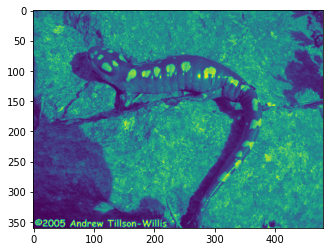

In [32]:
clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(8,8))

#Applying clahe to all the images
for image in trainSetCLAHE:
    image = clahe.apply(image)

plt.imshow(trainSetCLAHE[0])

# Load in the 2 pretained resnets

In [39]:
#Load in resnet 18
model = torchvision.models.resnet18(pretrained = True)  #selects a resnet model to use

#Freeze the weights of the model
for param in model.parameters():
    param.requires_grad = False

model.eval() #Freezes the model so it stops learning so you can run tests on it?

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Training the ResNets

In [ ]:
for i, (data, target) in enumerate(trainSetOG):
    opt

# Old reference work

In [9]:


img_1_np = cv2.imread("./images/fish.JPEG", 0)
print(type(img_1_np))
print(img_1_np.shape)

img_1_np = np.pad(img_1_np, ((0, picture_height - img_1_np.shape[0]),(0, picture_width - img_1_np.shape[1])))

#new_img_1 = Image.fromarray(img_1_np)


clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(8,8))

clahe_img_1 = clahe.apply(img_1_np)

fig, ((new_ax1,  new_ax2)) = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = True, figsize = (20, 5), dpi = 150, num = 1)
new_ax1.imshow(clahe_img_1, cmap = "gray") # Images are gray scale, ensuring that matplotlib displays them as such
new_ax2.imshow(img_1_np, cmap = "gray")

<class 'numpy.ndarray'>
(318, 426)


NameError: name 'picture_height' is not defined

**Back to our regularily scheduled program

In [ ]:
#Set up a transform to noramilze all the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Number of training examples
batch_size = 10

#Load the train and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#Define the classes for each (Already know these hence hard coded labels)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [ ]:
item = trainset.__getitem__(0)

print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(type(np.transpose(npimg, (1, 2, 0))))
    #plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show imagesb
imshow(torchvision.utils.make_grid(images))
# print images
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

<class 'numpy.ndarray'>


# Random Testing

<class 'torch.Tensor'>
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 32])

label info
torch.Size([10])
tensor(6)
frog


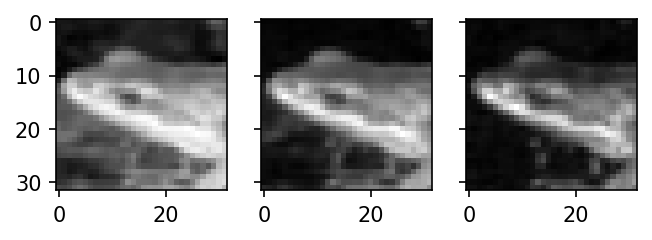

In [ ]:
print(type(images))
print(images.shape)
print(images[0].shape)
print(images[0][0].shape)

fig, ((a, b, c)) = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = (5, 5), dpi = 150, num = 1)

a.imshow(images[0][0], cmap = "gray")
b.imshow(images[0][1], cmap = "gray")
c.imshow(images[0][2], cmap = "gray")

print("\nlabel info")
print(labels.shape)
print(labels[0])
print(classes[labels[0]])


# Turn all the images into numpy images

In [ ]:
#Load all the train images into numpy arrays, same with labels
def getImages(arr):
    
    images = np.array([arr[0][0].cpu().detach().numpy()])
    labels = np.array([])
    for i in range(1, int(len(arr)/1000)):

        images = np.append(images, np.array([arr[i][0].cpu().detach().numpy()]), axis=0)
        labels = np.append(labels, arr[i][1])

    return images, labels

trainImgs, trainLabels = getImages(trainset)

print(trainImgs.shape)


(50, 3, 32, 32)


In [ ]:
#load all the test images and labels into numpy arrays
def getImages(arr):
    
    images = np.array([arr[0][0].cpu().detach().numpy()])
    labels = np.array([])
    for i in range(1, int(len(arr)/20)):

        images = np.append(images, np.array([arr[i][0].cpu().detach().numpy()]), axis=0)
        labels = np.append(labels, arr[i][1])

    return images, labels

testImgs, testLabels = getImages(testset)

# Simple practice

(318, 426, 3)
<class 'numpy.ndarray'>


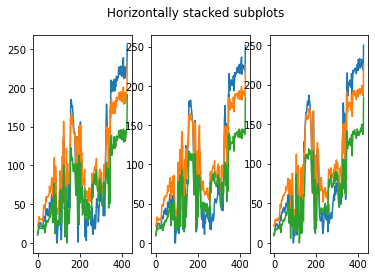

In [ ]:
fish = cv2.imread("images/fish.JPEG")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(fish[0])
ax2.plot(fish[1])
ax3.plot(fish[2])


print(fish.shape)
print(type(fish))
#plt.plot(fish[0])
#plt.show()

(3, 32, 32)
<class 'numpy.ndarray'>


ValueError: x and y can be no greater than 2D, but have shapes (3,) and (3, 32, 32)

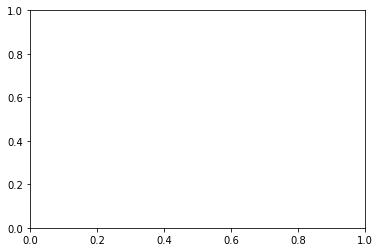

In [ ]:
fish = testImgs[0]

print(fish.shape)
print(type(fish))
plt.plot(fish)
plt.show()

# Apply CLAHE to image Set

In [ ]:
def applyClahe(imgset):
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    imgs = np.array([])
    
    for i in range(imgset.size):
        print(clahe.apply(imgset[i]).shape)
        #imgs = np.append(imgs, clahe.apply(imgset[i]))
    
    return imgs

print(type(trainImgs[0]))
trainImgsClahe = applyClahe(trainImgs)

<class 'numpy.ndarray'>


error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'


<class 'numpy.ndarray'>
(274, 3)
<class 'cv2.CLAHE'>


error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'


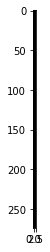

In [ ]:
def applyClahe(clahe, imgSet):
    newSet = np.array([])
    for img in imgSet:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = clahe.apply(img) + 30
        newSet.append(img)

    return newSet

#Applying CLAHE to them (Going to leave it in colour for the first try)
clahe = cv2.createCLAHE(clipLimit = 15.0, tileGridSize = (8,8))

img = trainImages[0]

#Turn the array into an image
#img = Image.fromarray(img)

print(type(img))
print(img.shape)
plt.imshow(img, cmap = "gray")
print(type(clahe))

img = clahe.apply(img)

#trainImagesClahed = applyClahe(clahe, trainImages)

Load a pretrained resnet18 NN

Load in the image set and run CLAHE on it.

In [ ]:
#Applying CLAHE to each image set
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

#for image in trainImages:
#    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    finalImage = clahe.apply(image_bw) + 30
#    cv2.imshow("Image", finalImage)
#    break
#for image in trainImages:

img_1 = Image.open("./fish.JPEG")

#picture_height = 3567 # Manually set
#picture_width = 3827 # Manually set
picture_width, picture_height = img_1.size
np_img_1 = np.array(img_1)

print(picture_height - np_img_1.shape[0])
print(picture_width - np_img_1.shape[1])
print(picture_height)
print(picture_width)
print(np_img_1.shape)

#img_1_np = np.pad(np_img_1, ((0, picture_height - np_img_1.shape[0]),(0, picture_width - np_img_1.shape[1])))
img_1_np = cv2.cvtColor(np_img_1, cv2.COLOR_BGR2GRAY)
clahe_img = clahe.apply(np_img_1)



FileNotFoundError: [Errno 2] No such file or directory: './fish.JPEG'

Train model A on CLAHE data set, and model B on regular image set

Graph the differences in the model accuracy